In [44]:
import numpy as np              # Одномерные и многомерные массивы (array)
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import matplotlib.pyplot as plt # Научная графика
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения
from threading import Thread

In [9]:
url = "C:/Users/Vladislav/Downloads/archive/all_regions.csv"
data_raw = pd.read_csv(url)

In [10]:
data_raw.shape

(1294757, 18)

In [11]:
data_raw

,brand,name,bodyType,color,fuelType,year,mileage,transmission,power,price,vehicleConfiguration,engineName,engineDisplacement,date,location,link,description,parse_date
0,Volkswagen,Golf,Хэтчбек 5 дв.,Серебристый,Бензин,NaN,240000.0,Механика,101.0,280000,NaN,NaN,NaN,2023-04-02 00:00:00,Майкоп,https://maykop.drom.ru/volkswagen/golf/5001300...,101 л.с. люк не течёт. Документы в порядке. Со...,2023-05-02 01:00:00
1,Лада,1111 Ока,Хэтчбек 3 дв.,Фиолетовый,Бензин,1996.0,37000.0,Механика,33.0,95000,0.6 MT 11113,ВАЗ-11113,0.7 LTR,2023-04-02 00:00:00,Майкоп,https://maykop.drom.ru/lada/oka/50378140.html,"Ваз Ока Год: 2003 Цвет: Баклажан, в ПТС так и ...",2023-05-02 20:00:00
2,Toyota,Funcargo,Хэтчбек 5 дв.,Серебристый,Бензин,2002.0,295000.0,АКПП,87.0,380000,1.3 J,2NZ-FE,1.3 LTR,2023-04-02 00:00:00,Майкоп,https://maykop.drom.ru/toyota/funcargo/5037751...,ХОРОШЕЕ СОСТОЯНИЕ. замена комплекта грм и помп...,2023-05-02 20:00:00
3,Лада,Гранта,Лифтбек,Серый,Бензин,2018.0,16000.0,Механика,106.0,795000,1.6 MT Comfort,ВАЗ-21127,1.6 LTR,2023-04-02 00:00:00,Майкоп,https://maykop.drom.ru/lada/granta/50382492.html,"Автомобиль в отличном техническом состоянии, н...",2023-05-02 23:00:00
4,Лада,Нива Легенд,Джип 3 дв.,Зеленый,Бензин,NaN,NaN,Механика,83.0,1022900,NaN,NaN,NaN,2023-04-02 00:00:00,Яблоновский,https://yablonovskiy.drom.ru/lada/niva_legend/...,Модель: Нива Легенд Комплектация: LADA (ВАЗ) N...,2023-05-02 20:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1294752,BMW,X1,Джип 5 дв.,Серый,Дизель,NaN,275000.0,АКПП,177.0,1000000,NaN,NaN,NaN,2023-06-01 00:00:00,Черкесск,https://cherkessk.drom.ru/bmw/x1/51154874.html,Продам автомобиль BMW X1 2d в идеальном состоя...,2023-06-01 21:00:00
1294753,Лада,2105,Седан,Белый,Бензин,1985.0,300000.0,Механика,64.0,165000,1.3 MT5 21050,ВАЗ-2105,1.3 LTR,2023-06-01 00:00:00,Усть-Джегута,https://ust-dzheguta.drom.ru/lada/2105/5114990...,продаю автомобиль изо не надобности автомобиль...,2023-06-01 13:00:00
1294754,Toyota,Camry,Седан,Серый,Бензин,2020.0,32000.0,АКПП,202.0,3100000,2.5 AT SE,A25A-FKS,2.5 LTR,2023-06-01 00:00:00,Черкесск,https://cherkessk.drom.ru/toyota/camry/5115596...,"Америнка,в отличном состоянии,любые проверки. ...",2023-06-01 20:00:00
1294755,Лада,4x4 2121 Нива,Джип 3 дв.,Белый,Бензин,1995.0,354000.0,Механика,79.0,298000,1.7 MT,ВАЗ-21213,1.7 LTR,2023-06-01 00:00:00,Черкесск,https://cherkessk.drom.ru/lada/2121_4x4_niva/5...,"Нива в хорошем состоянии, без гнили, лонжероны...",2023-06-01 23:00:00


In [12]:
data_raw.head(15)

,brand,name,bodyType,color,fuelType,year,mileage,transmission,power,price,vehicleConfiguration,engineName,engineDisplacement,date,location,link,description,parse_date
0,Volkswagen,Golf,Хэтчбек 5 дв.,Серебристый,Бензин,NaN,240000.0,Механика,101.0,280000,NaN,NaN,NaN,2023-04-02 00:00:00,Майкоп,https://maykop.drom.ru/volkswagen/golf/5001300...,101 л.с. люк не течёт. Документы в порядке. Со...,2023-05-02 01:00:00
1,Лада,1111 Ока,Хэтчбек 3 дв.,Фиолетовый,Бензин,1996.0,37000.0,Механика,33.0,95000,0.6 MT 11113,ВАЗ-11113,0.7 LTR,2023-04-02 00:00:00,Майкоп,https://maykop.drom.ru/lada/oka/50378140.html,"Ваз Ока Год: 2003 Цвет: Баклажан, в ПТС так и ...",2023-05-02 20:00:00
2,Toyota,Funcargo,Хэтчбек 5 дв.,Серебристый,Бензин,2002.0,295000.0,АКПП,87.0,380000,1.3 J,2NZ-FE,1.3 LTR,2023-04-02 00:00:00,Майкоп,https://maykop.drom.ru/toyota/funcargo/5037751...,ХОРОШЕЕ СОСТОЯНИЕ. замена комплекта грм и помп...,2023-05-02 20:00:00
3,Лада,Гранта,Лифтбек,Серый,Бензин,2018.0,16000.0,Механика,106.0,795000,1.6 MT Comfort,ВАЗ-21127,1.6 LTR,2023-04-02 00:00:00,Майкоп,https://maykop.drom.ru/lada/granta/50382492.html,"Автомобиль в отличном техническом состоянии, н...",2023-05-02 23:00:00
4,Лада,Нива Легенд,Джип 3 дв.,Зеленый,Бензин,NaN,NaN,Механика,83.0,1022900,NaN,NaN,NaN,2023-04-02 00:00:00,Яблоновский,https://yablonovskiy.drom.ru/lada/niva_legend/...,Модель: Нива Легенд Комплектация: LADA (ВАЗ) N...,2023-05-02 20:00:00
5,Лада,Гранта,Лифтбек,Черный,Бензин,NaN,NaN,Механика,90.0,966900,NaN,NaN,NaN,2023-04-02 00:00:00,Майкоп,https://maykop.drom.ru/lada/granta/50007643.html,Модель: Гранта Комплектация: LADA (ВАЗ) Granta...,2023-05-02 20:00:00
6,Лада,Гранта,Лифтбек,Черный,Бензин,NaN,NaN,Механика,90.0,992900,NaN,NaN,NaN,2023-04-02 00:00:00,Майкоп,https://maykop.drom.ru/lada/granta/50007640.html,Модель: Гранта Комплектация: LADA (ВАЗ) Granta...,2023-05-01 22:00:00
7,Лада,Нива Легенд,Джип 3 дв.,Белый,Бензин,NaN,NaN,Механика,83.0,972900,NaN,NaN,NaN,2023-04-02 00:00:00,Майкоп,https://maykop.drom.ru/lada/niva_legend/500076...,Модель: Нива Легенд Комплектация: LADA (ВАЗ) N...,2023-05-01 22:00:00
8,Лада,Гранта,Лифтбек,Черный,Бензин,NaN,NaN,Механика,90.0,942900,NaN,NaN,NaN,2023-04-02 00:00:00,Майкоп,https://maykop.drom.ru/lada/granta/50007643.html,Модель: Гранта Комплектация: LADA (ВАЗ) Granta...,2023-05-01 22:00:00
9,Chevrolet,Niva,Джип 5 дв.,Зеленый,Бензин,2002.0,220000.0,Механика,80.0,450000,1.7 MT L,ВАЗ-2123,1.7 LTR,2023-04-03 00:00:00,Майкоп,https://maykop.drom.ru/chevrolet/niva/50388675...,Продам шевика в хорошем состоянии. Гнили нет о...,2023-05-02 00:00:00


In [13]:
data_raw.tail()

,brand,name,bodyType,color,fuelType,year,mileage,transmission,power,price,vehicleConfiguration,engineName,engineDisplacement,date,location,link,description,parse_date
1294752,BMW,X1,Джип 5 дв.,Серый,Дизель,NaN,275000.0,АКПП,177.0,1000000,NaN,NaN,NaN,2023-06-01 00:00:00,Черкесск,https://cherkessk.drom.ru/bmw/x1/51154874.html,Продам автомобиль BMW X1 2d в идеальном состоя...,2023-06-01 21:00:00
1294753,Лада,2105,Седан,Белый,Бензин,1985.0,300000.0,Механика,64.0,165000,1.3 MT5 21050,ВАЗ-2105,1.3 LTR,2023-06-01 00:00:00,Усть-Джегута,https://ust-dzheguta.drom.ru/lada/2105/5114990...,продаю автомобиль изо не надобности автомобиль...,2023-06-01 13:00:00
1294754,Toyota,Camry,Седан,Серый,Бензин,2020.0,32000.0,АКПП,202.0,3100000,2.5 AT SE,A25A-FKS,2.5 LTR,2023-06-01 00:00:00,Черкесск,https://cherkessk.drom.ru/toyota/camry/5115596...,"Америнка,в отличном состоянии,любые проверки. ...",2023-06-01 20:00:00
1294755,Лада,4x4 2121 Нива,Джип 3 дв.,Белый,Бензин,1995.0,354000.0,Механика,79.0,298000,1.7 MT,ВАЗ-21213,1.7 LTR,2023-06-01 00:00:00,Черкесск,https://cherkessk.drom.ru/lada/2121_4x4_niva/5...,"Нива в хорошем состоянии, без гнили, лонжероны...",2023-06-01 23:00:00
1294756,Лада,4x4 2121 Нива,Джип 3 дв.,Белый,Бензин,1995.0,354000.0,Механика,79.0,320000,1.7 MT,ВАЗ-21213,1.7 LTR,2023-06-01 00:00:00,Черкесск,https://cherkessk.drom.ru/lada/2121_4x4_niva/5...,"Нива в хорошем состоянии, без гнили, лонжероны...",2023-06-01 21:00:00


In [14]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1294757 entries, 0 to 1294756
Data columns (total 18 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   brand                 1294757 non-null  object 
 1   name                  1294757 non-null  object 
 2   bodyType              1294757 non-null  object 
 3   color                 1257029 non-null  object 
 4   fuelType              1289815 non-null  object 
 5   year                  724644 non-null   float64
 6   mileage               771799 non-null   float64
 7   transmission          1289563 non-null  object 
 8   power                 1273353 non-null  float64
 9   price                 1294757 non-null  int64  
 10  vehicleConfiguration  724647 non-null   object 
 11  engineName            720976 non-null   object 
 12  engineDisplacement    717625 non-null   object 
 13  date                  1294757 non-null  object 
 14  location              1294757 non-

In [28]:
data_raw['brand'] = data_raw['brand'].astype('category')
data_raw['bodyType'] = data_raw['bodyType'].astype('category')
data_raw['color'] = data_raw['color'].astype('category')
data_raw['fuelType'] = data_raw['fuelType'].astype('category')
data_raw['transmission'] = data_raw['transmission'].astype('category')
data_raw['engineDisplacement'] = data_raw['engineDisplacement'].astype('category')
data_raw['name'] = data_raw['name'].astype('category')

In [17]:
data_raw['brand'].dtype

CategoricalDtype(categories=['AC', 'AITO', 'Acura', 'Alfa Romeo', 'Alpina', 'Aro', 'Asia',
                  'Aston Martin', 'Audi', 'Avatr',
                  ...
                  'ЗАЗ', 'ЗИЛ', 'ЗиС', 'ИЖ', 'Лада', 'ЛуАЗ', 'Москвич',
                  'Прочие авто', 'ТагАЗ', 'УАЗ'],
, ordered=False)

In [18]:
data_raw['bodyType'].dtype

CategoricalDtype(categories=['Джип 3 дв.', 'Джип 5 дв.', 'Купе', 'Лифтбек', 'Минивэн',
                  'Открытый', 'Пикап', 'Седан', 'Универсал', 'Хэтчбек 3 дв.',
                  'Хэтчбек 5 дв.'],
, ordered=False)

In [19]:
data_raw['color'].dtype

CategoricalDtype(categories=['Бежевый', 'Белый', 'Бордовый', 'Голубой', 'Желтый',
                  'Зеленый', 'Золотистый', 'Коричневый', 'Красный',
                  'Оранжевый', 'Розовый', 'Серебристый', 'Серый', 'Синий',
                  'Фиолетовый', 'Черный'],
, ordered=False)

In [20]:
data_raw['fuelType'].dtype

CategoricalDtype(categories=['Бензин', 'Дизель', 'Электро'], ordered=False)

In [22]:
data_raw['transmission'].dtype

CategoricalDtype(categories=['АКПП', 'Автомат', 'Вариатор', 'Механика', 'Робот'], ordered=False)

In [24]:
data_raw['engineDisplacement'].dtype

CategoricalDtype(categories=['0.5 LTR', '0.6 LTR', '0.7 LTR', '0.8 LTR', '0.9 LTR',
                  '1.0 LTR', '1.1 LTR', '1.2 LTR', '1.3 LTR', '1.4 LTR',
                  '1.5 LTR', '1.6 LTR', '1.7 LTR', '1.8 LTR', '1.9 LTR',
                  '2.0 LTR', '2.1 LTR', '2.2 LTR', '2.3 LTR', '2.4 LTR',
                  '2.5 LTR', '2.6 LTR', '2.7 LTR', '2.8 LTR', '2.9 LTR',
                  '3.0 LTR', '3.1 LTR', '3.2 LTR', '3.3 LTR', '3.4 LTR',
                  '3.5 LTR', '3.6 LTR', '3.7 LTR', '3.8 LTR', '3.9 LTR',
                  '4.0 LTR', '4.1 LTR', '4.2 LTR', '4.3 LTR', '4.4 LTR',
                  '4.5 LTR', '4.6 LTR', '4.7 LTR', '4.8 LTR', '4.9 LTR',
                  '5.0 LTR', '5.2 LTR', '5.3 LTR', '5.4 LTR', '5.5 LTR',
                  '5.6 LTR', '5.7 LTR', '5.8 LTR', '5.9 LTR', '6.0 LTR',
                  '6.1 LTR', '6.2 LTR', '6.3 LTR', '6.4 LTR', '6.5 LTR',
                  '6.6 LTR', '6.7 LTR', '6.8 LTR', '7.0 LTR', '7.6 LTR',
                  '8.0 LTR', '8.1 LTR', 

In [29]:
data_raw['name'].dtype

CategoricalDtype(categories=['001', '009', '05', '09', '1-Series', '100', '1007', '100NX',
                  '107', '11',
                  ...
                  'Таврия', 'ТагАЗ', 'Тагер', 'Форца', 'Х-Кросс 5', 'Х-рей',
                  'Х-рей Кросс', 'Хантер', 'Чайка', 'Шанс'],
, ordered=False)

In [30]:
data_raw.describe()

,year,mileage,power,price
count,724644.000000,771799.000000,1.273353e+06,1.294757e+06
mean,2009.684535,154893.397115,1.415560e+02,1.444358e+06
std,9.367108,100738.336936,6.563943e+01,1.970257e+06
min,1936.000000,1000.000000,1.000000e+00,2.700000e+02
25%,2003.000000,82000.000000,9.800000e+01,4.250000e+05
50%,2011.000000,144000.000000,1.280000e+02,8.700000e+05
75%,2017.000000,211000.000000,1.630000e+02,1.765000e+06
max,2023.000000,1000000.000000,1.000000e+03,1.500000e+08


In [31]:
data_raw.describe(include=['category'])

,brand,name,bodyType,color,fuelType,transmission,engineDisplacement
count,1294757,1294757,1294757,1257029,1289815,1289563,717625
unique,160,2223,11,16,3,5,69
top,Toyota,Гранта,Джип 5 дв.,Белый,Бензин,АКПП,1.5 LTR
freq,265598,33536,427108,321170,1173467,511032,139732


In [32]:
data_raw.isnull().sum()

brand                        0
name                         0
bodyType                     0
color                    37728
fuelType                  4942
year                    570113
mileage                 522958
transmission              5194
power                    21404
price                        0
vehicleConfiguration    570110
engineName              573781
engineDisplacement      577132
date                         0
location                     0
link                         0
description              40352
parse_date                   0
dtype: int64

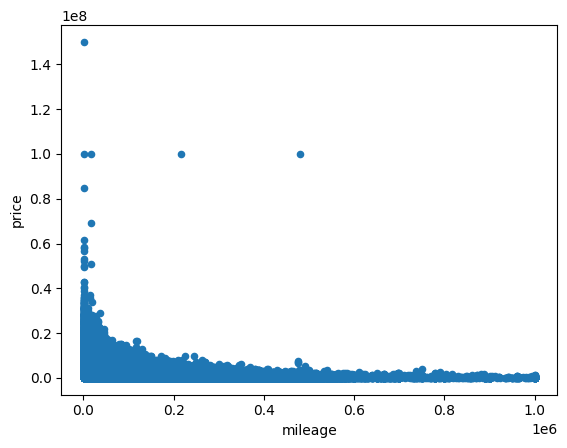

In [45]:
data_raw.plot(kind='scatter', x='mileage', y='price')
pass

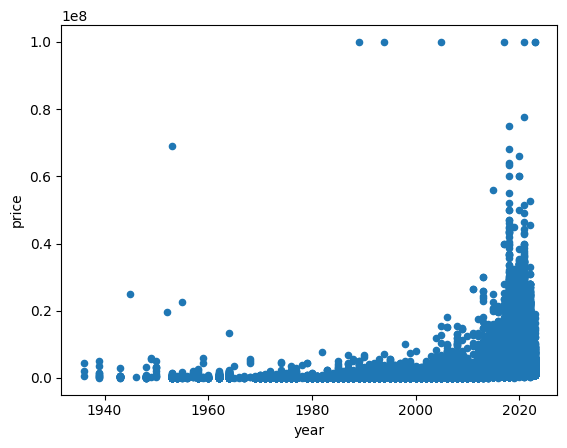

In [35]:
data_raw.plot(kind='scatter', x='year', y='price')
pass

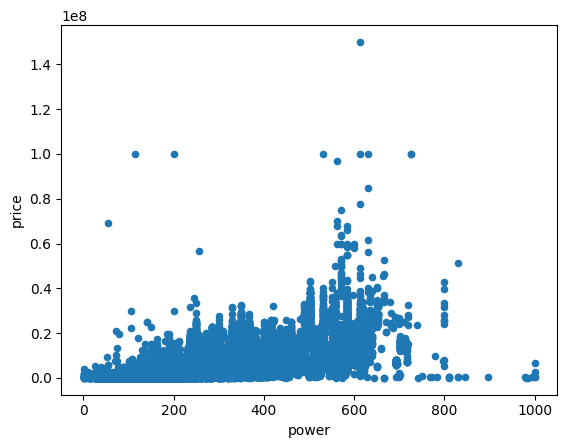

In [37]:
data_raw.plot(kind='scatter', x='power', y='price')
pass

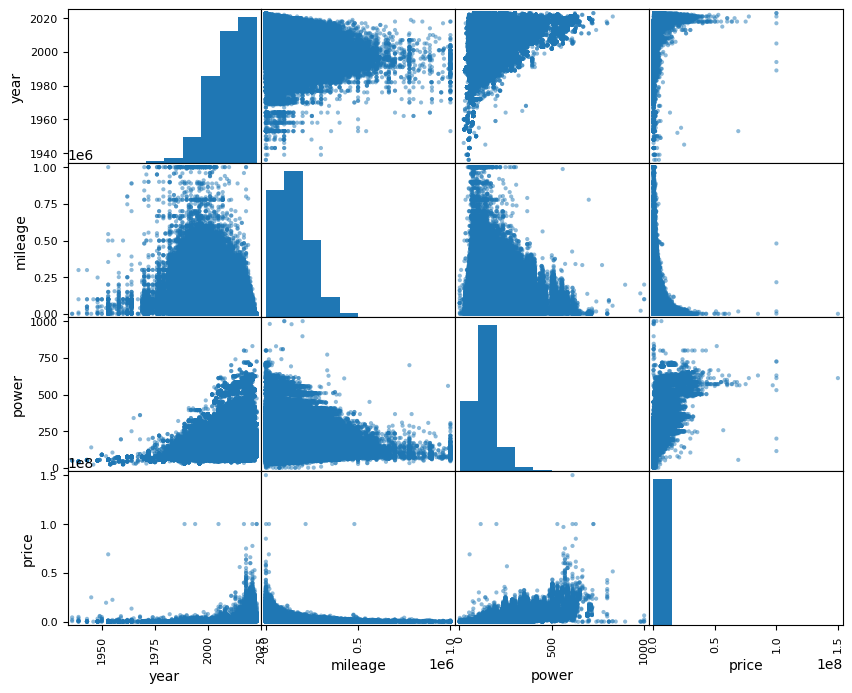

In [43]:
pd.plotting.scatter_matrix(data_raw, figsize = (10, 8))
pass

In [51]:
data_raw[data_raw['price'] > 50000000]

,brand,name,bodyType,color,fuelType,year,mileage,transmission,power,price,vehicleConfiguration,engineName,engineDisplacement,date,location,link,description,parse_date
416347,Toyota,Crown,Седан,Белый,Бензин,1989.0,216000.0,АКПП,200.0,99999999,3.0 royal saloon (column),7M-GE,3.0 LTR,2023-05-19 00:00:00,Комсомольск-на-Амуре,https://komsomolsk.drom.ru/toyota/crown/492403...,"зимняя новая резина, сигнализация StarLine под...",2023-05-19 18:00:00
758048,Lamborghini,Urus,Джип 5 дв.,Желтый,Бензин,2022.0,NaN,АКПП,666.0,52800000,4.0 AT S,NaN,NaN,2023-05-08 00:00:00,Новосибирск,https://novosibirsk.drom.ru/lamborghini/urus/5...,"Новый автомобиль, срок поставки 3 недели. Сало...",2023-05-09 01:00:00
869610,BMW,5-Series,Седан,Черный,Бензин,1994.0,480000.0,Механика,115.0,99999999,518i MT,M43B18,1.8 LTR,2023-05-08 00:00:00,Суксун,https://suksun.drom.ru/bmw/5-series/50835836.html,BOOM.ер. На ходу. Двигатель в очень хорошем со...,2023-05-09 01:00:00
874256,Kia,Mohave,Джип 5 дв.,Белый,Дизель,NaN,1000.0,Автомат,257.0,56790000,NaN,NaN,NaN,2023-05-30 00:00:00,Пермь,https://perm.drom.ru/kia/mohave/51128768.html,.АВТОКРЕДИТ БЕЗ ПЕРВОГО ВЗНОСА.АВТООБМЕН - ДОП...,2023-06-04 14:00:00
1081628,Rolls-Royce,Phantom,Седан,Фиолетовый,Бензин,NaN,1000.0,Автомат,571.0,53022720,NaN,NaN,NaN,2023-05-01 00:00:00,Москва,https://moscow.drom.ru/rolls-royce/phantom/503...,Rolls-Royce Phantom в наличии. 2018 год Цвет к...,2023-05-02 04:00:00
1084793,Mercedes-Benz,S-Class,Седан,NaN,Бензин,2021.0,NaN,АКПП,612.0,77607000,Mercedes-Maybach S680 4MATIC,M 279 E 60 AL,6.0 LTR,2023-05-02 00:00:00,Москва,https://moscow.drom.ru/mercedes-benz/s-class/4...,3D комбинация приборов MANUFAKTUR пакет кожи M...,2023-05-02 17:00:00
1097359,Mercedes-Benz,S-Class,Седан,Черный,Бензин,NaN,1000.0,АКПП,630.0,85000000,NaN,NaN,NaN,2023-05-08 00:00:00,Москва,https://moscow.drom.ru/mercedes-benz/s-class/5...,«ЛУКАВТО» – официальный дилер Mercedes-Benz в ...,2023-05-08 18:00:00
1101683,Bugatti,Veyron,Купе,NaN,Бензин,2005.0,18000.0,Робот,NaN,99999999,8.0 DSG Veyron 16.4,NaN,NaN,2023-05-11 00:00:00,Москва,https://moscow.drom.ru/bugatti/veyron/50871436...,Bugatti Veyron Год выпуска: 2007 Пробег: 18.00...,2023-05-12 00:00:00
1103429,Mercedes-Benz,G-Class,Джип 5 дв.,Зеленый,Бензин,NaN,NaN,Автомат,585.0,55000000,NaN,NaN,NaN,2023-05-11 00:00:00,Москва,https://moscow.drom.ru/mercedes-benz/g-class/5...,Модель: G-Class Комплектация: G-Class AMG G 63...,2023-05-11 02:00:00
1103939,Rolls-Royce,Cullinan,Джип 5 дв.,NaN,Бензин,2018.0,NaN,АКПП,571.0,74999999,6.8 AT 4WD,N74B68,6.7 LTR,2023-05-12 00:00:00,Москва,https://moscow.drom.ru/rolls-royce/cullinan/50...,NaN,2023-05-12 17:00:00


In [53]:
data_raw[data_raw['power'] > 900]

,brand,name,bodyType,color,fuelType,year,mileage,transmission,power,price,vehicleConfiguration,engineName,engineDisplacement,date,location,link,description,parse_date
41870,Прочие авто,Россия и СНГ,Открытый,Белый,Бензин,NaN,200000.0,Механика,1000.0,430000,NaN,NaN,NaN,2023-05-19 00:00:00,Раздольное,https://razdolnoe-krym.drom.ru/other/rus/50946...,"Продам Газель в отличном состоянии. На газу, г...",2023-05-20 04:00:00
62317,Лада,4x4 2121 Нива,Джип 3 дв.,Зеленый,Бензин,NaN,101000.0,Механика,1000.0,190000,NaN,NaN,NaN,2023-05-10 00:00:00,Чульман,https://chulman.drom.ru/lada/2121_4x4_niva/464...,"Продам ниву. Не гнилая, свеже крашена,есть кот...",2023-05-15 18:00:00
66873,Прочие авто,Россия и СНГ,Минивэн,Белый,Бензин,NaN,22000.0,Механика,981.0,80000,NaN,NaN,NaN,2023-05-26 00:00:00,Нерюнгри,https://neryungri.drom.ru/other/rus/51066857.html,"Нужно сделать электрику, настроить трамблер пр...",2023-05-29 21:00:00
135657,Лада,2114 Самара,Хэтчбек 5 дв.,Черный,Бензин,NaN,NaN,Механика,985.0,135000,NaN,NaN,NaN,2023-06-08 00:00:00,Языково,https://yazykovo-ufa.drom.ru/lada/2114/5044906...,Продаётся ваз 2114 в хорошем состоянии не биты...,2023-06-08 14:00:00
400925,Nissan,GT-R,Купе,Синий,Бензин,NaN,NaN,Автомат,1000.0,6500000,NaN,NaN,NaN,2023-06-21 00:00:00,Ставрополь,https://stavropol.drom.ru/nissan/gt-r/46844974...,Расчётная мощность 1000 л/с Пожалуйста не срав...,2023-06-21 17:00:00
419140,Toyota,Cresta,Седан,Серый,Бензин,NaN,100000.0,Механика,1000.0,2500000,NaN,NaN,NaN,2023-05-24 00:00:00,Хабаровск,https://habarovsk.drom.ru/toyota/cresta/489747...,СОБСТВЕННИК* * 15 лет в моих руках . * 180 ЛС ...,2023-05-25 08:00:00
681645,SsangYong,Istana,Минивэн,Зеленый,Дизель,NaN,NaN,Механика,995.0,430000,NaN,NaN,NaN,2023-06-21 00:00:00,Кемерово,https://kemerovo.drom.ru/ssang_yong/istana/506...,хорошие состояния на 4,2023-06-21 15:00:00
923521,Лада,Приора,Универсал,Черный,Бензин,NaN,140000.0,Механика,979.0,419000,NaN,NaN,NaN,2023-04-29 00:00:00,Берёзовский,https://berezovskiy-sverd.drom.ru/lada/priora/...,"ОДИН СОБСТВЕНИК, МАКСИМАЛЬНАЯ КОМПЛЕКТАЦИЯ, ОР...",2023-05-02 04:00:00


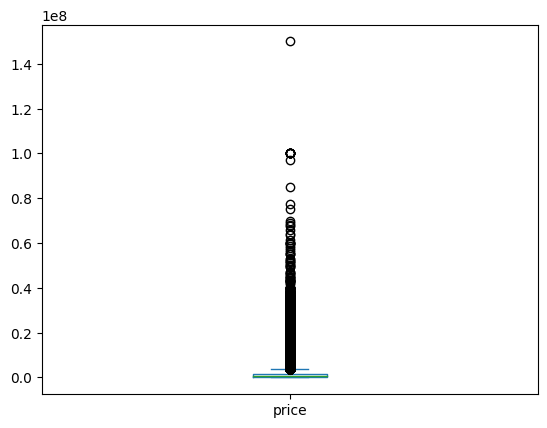

In [38]:
data_raw['price'].plot(kind='box')
pass

In [42]:
data_raw['price'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005       47000.0
0.010       59000.0
0.050      120000.0
0.100      195000.0
0.500      870000.0
0.900     3190000.0
0.950     4270900.0
0.990     9000000.0
0.995    12800000.0
Name: price, dtype: float64

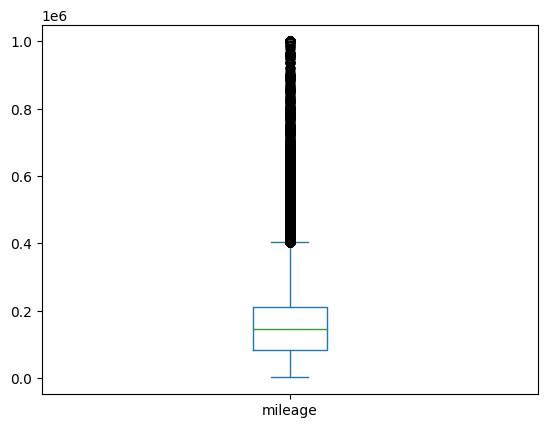

In [39]:
data_raw['mileage'].plot(kind='box')
pass

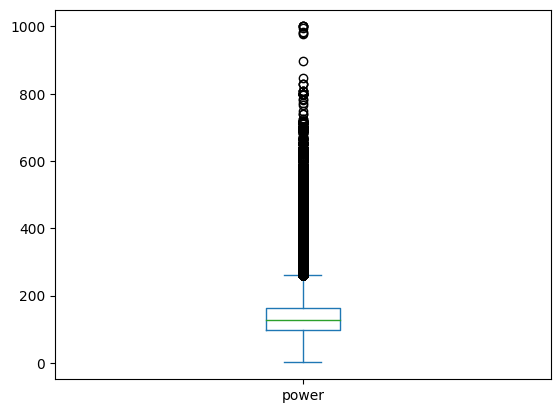

In [40]:
data_raw['power'].plot(kind='box')
pass